# ORIENTAÇÕES PARA O IMPORTAÇÃO DOS DADOS
Para importar corretamente a base de dados dos Microdados do Enade é necessário considerar os seguintes requisitos:

• a importação deve considerar o separador ponto e vírgula (;);

• a primeira linha sendo considerada o cabeçalho;

• os decimais devem ser importados em formato de ponto (.);

• considerar os valores faltantes como aspas duplas (“);

• é necessário importar as colunas “DS_VT_ACE_OFG” e “DS_VT_ACE_OCE” como caractere (string).

## Criacao de uma pasta para arquivos aux

In [1]:
import os

#pasta aux_files
aux_files = "aux_files"
try:
    os.makedirs(aux_files)
    print(f"Pasta '{aux_files}' criada com sucesso.")
except FileExistsError:
    print(f"A pasta '{aux_files}' já existe.")

#pasta microdados_tratados
microdados_tratados = "microdados_tratados"

try:
    os.makedirs(microdados_tratados)
    print(f"Pasta '{microdados_tratados}' criada com sucesso.")
except FileExistsError:
    print(f"A pasta '{microdados_tratados}' já existe.")


A pasta 'aux_files' já existe.
Pasta 'microdados_tratados' criada com sucesso.


## Tratamento dos Vetores
Pegar os vetores e transformar em colunas cada uma com o nome

1. DS_VT_ACE_OFG - "*forma_geral_q_x*"

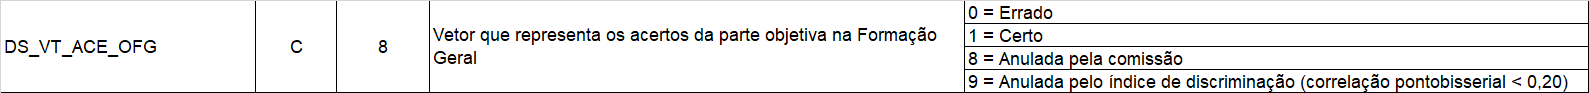

2. DS_VT_ACE_OCE - "*forma_espec_q_y*"

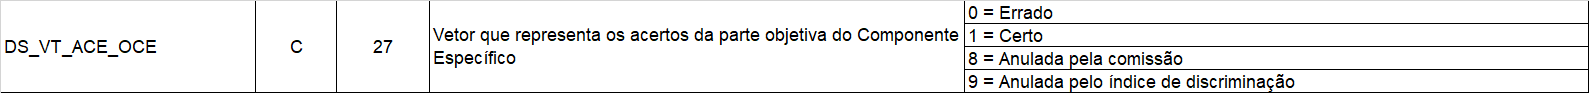


3. Nomes das instituições de ensino como coluna junto com o curso

4. DS_VT_ESC_OFG - "*forma_geral_alternativa_q_x*"

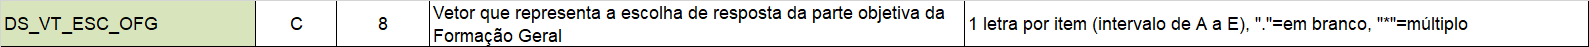

5. DS_VT_ESC_OCE - "*forma_espec_alternativa_q_y*"

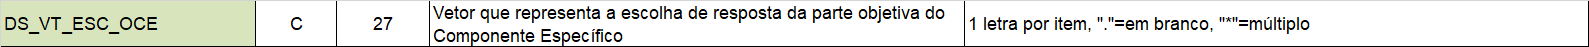



In [2]:
import re

#entrada = "microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq3.txt"
entrada = "Microdados_Enade_2023\DADOS\microdados2023_arq3.txt"


with open(entrada, 'r', encoding='utf-8') as arquivo_entrada:
    linhas = arquivo_entrada.readlines()

    pattern_ofg = re.compile(r'\bDS_VT_ACE_OFG\b')
    pattern_oce = re.compile(r'\bDS_VT_ACE_OCE\b')
    pattern_esc_ofg = re.compile(r'\bDS_VT_ESC_OFG\b')
    pattern_esc_oce = re.compile(r'\bDS_VT_ESC_OCE\b')

    match_ofg = pattern_ofg.search(linhas[0])
    match_oce = pattern_oce.search(linhas[0])
    match_esc_ofg = pattern_esc_ofg.search(linhas[0])
    match_esc_oce = pattern_esc_oce.search(linhas[0])

    if not match_ofg:
        raise ValueError("Coluna 'DS_VT_ACE_OFG' não encontrada no arquivo de entrada.")
    if not match_oce:
        raise ValueError("Coluna 'DS_VT_ACE_OCE' não encontrada no arquivo de entrada.")
    if not match_esc_ofg:
        raise ValueError("Coluna 'DS_VT_ESC_OFG' não encontrada no arquivo de entrada.")
    if not match_esc_oce:
        raise ValueError("Coluna 'DS_VT_ESC_OCE' não encontrada no arquivo de entrada.")

    indice_ds_vt_ace_ofg = linhas[0].count(';', 0, match_ofg.start())
    indice_ds_vt_ace_oce = linhas[0].count(';', 0, match_oce.start())
    indice_ds_vt_esc_ofg = linhas[0].count(';', 0, match_esc_ofg.start())
    indice_ds_vt_esc_oce = linhas[0].count(';', 0, match_esc_oce.start())

    novo_cabecalho = linhas[0].strip() + ';' + ';'.join([f'forma_geral_q_{i+1}' for i in range(8)]) + ';' + ';'.join([f'forma_espec_q_{i+1}' for i in range(27)]) + ';' + ';'.join([f'forma_geral_alternativa_q_{i+1}' for i in range(8)]) + ';' + ';'.join([f'forma_espec_alternativa_q_{i+1}' for i in range(27)])
    linhas_processadas = [novo_cabecalho]

    for linha in linhas[1:]:
        linha = linha.strip()
        partes = linha.split(';')

        ds_vt_ace_ofg = partes[indice_ds_vt_ace_ofg].strip('"')
        ds_vt_ace_oce = partes[indice_ds_vt_ace_oce].strip('"')
        ds_vt_esc_ofg = partes[indice_ds_vt_esc_ofg].strip('"')
        ds_vt_esc_oce = partes[indice_ds_vt_esc_oce].strip('"')

        caracteres_ofg = [ds_vt_ace_ofg[i:i + 1] if len(ds_vt_ace_ofg) > i else '' for i in range(8)]
        caracteres_oce = [ds_vt_ace_oce[i:i + 1] if len(ds_vt_ace_oce) > i else '' for i in range(27)]
        caracteres_esc_ofg = ['.' if char == '.' else ('*' if char == '*' else char) for char in ds_vt_esc_ofg]
        caracteres_esc_oce = ['.' if char == '.' else ('*' if char == '*' else char) for char in ds_vt_esc_oce]        

        nova_linha = linha + ';' + ';'.join(caracteres_ofg) + ';' + ';'.join(caracteres_oce) + ';' + ';'.join(caracteres_esc_ofg) + ';' + ';'.join(caracteres_esc_oce)
        linhas_processadas.append(nova_linha)
 #novo       
dir_saida=f'{aux_files}/vetor_microdado_3.csv'

with open(dir_saida, 'w', newline='', encoding='utf-8') as arquivo_saida:
    for linha in linhas_processadas:
        arquivo_saida.write(linha + '\n')

print(f"Processamento concluído.\nArquivo de saída gerado: {dir_saida}")


Processamento concluído.
Arquivo de saída gerado: aux_files/vetor_microdado_3.csv


## Arquivo auxiliar para mapeamento de Curso

Arquivo auxiliar para consulta do CO_CURSO	CO_IES


In [8]:
import pandas as pd
import csv

mapa_grupo_nome_curso = {
   26: "Design",
    72: "Tecnologia em Análise e Desenvolvimento de Sistemas",
    79: "Tecnologia em Redes de Computadores",
    702: "Matemática (Licenciatura)",
    904: "Letras-Português (Licenciatura)",
    905: "Letras-Português e Inglês (Licenciatura)",
    906: "Letras-Português e Espanhol (Licenciatura)",
    1402: "Física (Licenciatura)",
    1501: "Química (Bacharelado)",
    1502: "Química (Licenciatura)",
    1601: "Ciências Biológicas (Bacharelado)",
    1602: "Ciências Biológicas (Licenciatura)",
    2001: "Pedagogia (Licenciatura)",
    2401: "História (Bacharelado)",
    2402: "História (Licenciatura)",
    2501: "Artes Visuais (Licenciatura)",
    3001: "Geografia (Bacharelado)",
    3002: "Geografia (Licenciatura)",
    3201: "Filosofia (Bacharelado)",
    3202: "Filosofia (Licenciatura)",
    3501: "Educação Física (Bacharelado)",
    3502: "Educação Física (Licenciatura)",
    4004: "Ciência Da Computação (Bacharelado)",
    4005: "Ciência Da Computação (Licenciatura)",
    4006: "Sistemas de Informação",
    4301: "Música (Licenciatura)",
    5401: "Ciências Sociais (Bacharelado)",
    5402: "Ciências Sociais (Licenciatura)",
    6407: "Letras-Inglês (Licenciatura)",
    6409: "Tecnologia em Gestão da Tecnologia da Informação",
    5: "Medicina Veterinária",
    6: "Odontologia",
    12: "Medicina",
    17: "Agronomia",
    19: "Farmácia",
    21: "Arquitetura e Urbanismo",
    23: "Enfermagem",
    27: "Fonoaudiologia",
    28: "Nutrição",
    36: "Fisioterapia",
    51: "Zootecnia",
    55: "Biomedicina",
    69: "Tecnologia em Radiologia",
    90: "Tecnologia em Agronegócios",
    91: "Tecnologia em Gestão Hospitalar",
    92: "Tecnologia em Gestão Ambiental",
    95: "Tecnologia em Estética e Cosmética",
    5710: "Engenharia Civil",
    5806: "Engenharia Elétrica",
    5814: "Engenharia de Controle e Automação",
    5902: "Engenharia Mecânica",
    6002: "Engenharia de Alimentos",
    6008: "Engenharia Química",
    6208: "Engenharia de Produção",
    6307: "Engenharia Ambiental",
    6405: "Engenharia Florestal",
    6410: "Tecnologia em Segurança no Trabalho",
    6411: "Engenharia de Computação I",

}
#entradas
pda_dados = pd.read_csv(f'{aux_files}/PDA_Dados_Cursos_Graduacao_Brasil.csv')
#microdados = pd.read_csv("microdados_Enade_2021_LGPD/2.DADOS/microdados2021_arq1.txt", delimiter=';')
microdados = pd.read_csv("Microdados_Enade_2023\DADOS\microdados2023_arq1.txt", delimiter=';')

mapa_ies_nome = dict(zip(pda_dados['CODIGO_IES'], pda_dados['NOME_IES']))

mapa_curso_nome = dict(zip(pda_dados['CODIGO_CURSO'], pda_dados['NOME_IES']))

microdados['NOME_IES'] = microdados['CO_IES'].map(mapa_ies_nome)

microdados.loc[microdados['NOME_IES'].isna(), 'NOME_IES'] = microdados['CO_CURSO'].map(mapa_curso_nome)


microdados['NOME_IES'] = microdados['NOME_IES'].str.upper()

microdados['NOME_CURSO'] = microdados['CO_GRUPO'].map(mapa_grupo_nome_curso)


microdados.to_csv(f'{aux_files}/microdados_aux.csv', sep=';', index=False, quoting=csv.QUOTE_NONNUMERIC, quotechar='"')

print("Arquivo auxiliar gerado")


Arquivo auxiliar gerado


## Arquivo Formatado para vetores
Combinar os dados dos arquivos microdados_aux.csv e vetor_microdado_3.csv pela referencia do CO_CURSO

In [9]:
!pip install unidecode

In [15]:
import pandas as pd
import csv
from unidecode import unidecode
import numpy as np

# --- RUTAS (ajusta estas variables antes de ejecutar) ---
# aux_files = "ruta/a/aux_files"
# microdados_tratados = "ruta/a/microdados_tratados"

# --- ESQUEMA DE TIPOS ---
colunas_int = [
    'NU_ANO', 'CO_CURSO', 'NU_ITEM_OFG', 'NU_ITEM_OFG_Z', 'NU_ITEM_OFG_X', 
    'NU_ITEM_OFG_N', 'NU_ITEM_OCE', 'NU_ITEM_OCE_Z', 'NU_ITEM_OCE_X', 'NU_ITEM_OCE_N',
    'TP_PRES', 'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE', 'TP_PR_DI_CE',
    'TP_SFG_D1', 'TP_SFG_D2', 'TP_SCE_D1', 'TP_SCE_D2', 'TP_SCE_D3',
    'NT_FG_D1', 'NT_FG_D1_PT', 'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT', 'NT_FG_D2_CT',
    'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3',
    'forma_geral_q_1', 'forma_geral_q_2', 'forma_geral_q_3', 'forma_geral_q_4',
    'forma_geral_q_5', 'forma_geral_q_6', 'forma_geral_q_7', 'forma_geral_q_8',
    'forma_espec_q_1', 'forma_espec_q_2', 'forma_espec_q_3', 'forma_espec_q_4',
    'forma_espec_q_5', 'forma_espec_q_6', 'forma_espec_q_7', 'forma_espec_q_8',
    'forma_espec_q_9', 'forma_espec_q_10', 'forma_espec_q_11', 'forma_espec_q_12',
    'forma_espec_q_13', 'forma_espec_q_14', 'forma_espec_q_15', 'forma_espec_q_16',
    'forma_espec_q_17', 'forma_espec_q_18', 'forma_espec_q_19', 'forma_espec_q_20',
    'forma_espec_q_21', 'forma_espec_q_22', 'forma_espec_q_23', 'forma_espec_q_24',
    'forma_espec_q_25', 'forma_espec_q_26', 'forma_espec_q_27'
]

colunas_float = ['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE']

colunas_str = [
    'DS_VT_GAB_OFG_FIN', 'DS_VT_GAB_OCE_FIN', 'DS_VT_ESC_OFG', 'DS_VT_ACE_OFG',
    'DS_VT_ESC_OCE', 'DS_VT_ACE_OCE', 'CO_RS_I1', 'CO_RS_I2', 'CO_RS_I3', 'CO_RS_I4',
    'CO_RS_I5', 'CO_RS_I6', 'CO_RS_I7', 'CO_RS_I8', 'CO_RS_I9'
]

colunas_selecionadas = [
    'NU_ANO', 'CO_CURSO', 'NOME_CURSO', 'CO_IES', 'NOME_IES',
    'DS_VT_GAB_OFG_FIN', 'DS_VT_GAB_OCE_FIN', 'DS_VT_ESC_OFG', 'DS_VT_ACE_OFG',
    'DS_VT_ESC_OCE', 'DS_VT_ACE_OCE',
    'forma_geral_q_1', 'forma_geral_q_2', 'forma_geral_q_3', 'forma_geral_q_4',
    'forma_geral_q_5', 'forma_geral_q_6', 'forma_geral_q_7', 'forma_geral_q_8',
    'NT_OBJ_FG',
    'forma_espec_q_1','forma_espec_q_2','forma_espec_q_3','forma_espec_q_4',
    'forma_espec_q_5','forma_espec_q_6','forma_espec_q_7','forma_espec_q_8',
    'forma_espec_q_9','forma_espec_q_10','forma_espec_q_11','forma_espec_q_12',
    'forma_espec_q_13','forma_espec_q_14','forma_espec_q_15','forma_espec_q_16',
    'forma_espec_q_17','forma_espec_q_18','forma_espec_q_19','forma_espec_q_20',
    'forma_espec_q_21','forma_espec_q_22','forma_espec_q_23','forma_espec_q_24',
    'forma_espec_q_25','forma_espec_q_26','forma_espec_q_27',
    'NT_OBJ_CE',
    'forma_geral_alternativa_q_1','forma_geral_alternativa_q_2','forma_geral_alternativa_q_3',
    'forma_geral_alternativa_q_4','forma_geral_alternativa_q_5','forma_geral_alternativa_q_6',
    'forma_geral_alternativa_q_7','forma_geral_alternativa_q_8',
    'forma_espec_alternativa_q_1','forma_espec_alternativa_q_2','forma_espec_alternativa_q_3',
    'forma_espec_alternativa_q_4','forma_espec_alternativa_q_5','forma_espec_alternativa_q_6',
    'forma_espec_alternativa_q_7','forma_espec_alternativa_q_8','forma_espec_alternativa_q_9',
    'forma_espec_alternativa_q_10','forma_espec_alternativa_q_11','forma_espec_alternativa_q_12',
    'forma_espec_alternativa_q_13','forma_espec_alternativa_q_14','forma_espec_alternativa_q_15',
    'forma_espec_alternativa_q_16','forma_espec_alternativa_q_17','forma_espec_alternativa_q_18',
    'forma_espec_alternativa_q_19','forma_espec_alternativa_q_20','forma_espec_alternativa_q_21',
    'forma_espec_alternativa_q_22','forma_espec_alternativa_q_23','forma_espec_alternativa_q_24',
    'forma_espec_alternativa_q_25','forma_espec_alternativa_q_26','forma_espec_alternativa_q_27',
    'NT_GER', 'NT_FG', 'NT_CE',
]

# --- FUNCIONES DE CONVERSIÓN SEGURAS ---
def to_int64_seguro(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()
    s = s.replace({'': pd.NA, '.': pd.NA, 'nan': pd.NA, 'None': pd.NA}, regex=False)
    s = s.str.replace(r'[^\d-]+', '', regex=True)  # elimina no dígitos (y deja signo)
    num = pd.to_numeric(s, errors='coerce')
    num = num.where(num.isna() | (num % 1 == 0))
    return num.astype('Int64')

def to_float_seguro(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().replace({'': pd.NA, '.': pd.NA, 'nan': pd.NA, 'None': pd.NA}, regex=False)
    s = s.str.replace(',', '.', regex=False)
    return pd.to_numeric(s, errors='coerce')

# --- LECTURA ROBUSTA (forzando header) ---
ruta_vetor = f'{aux_files}/vetor_microdado_3.csv'
with open(ruta_vetor, encoding="utf-8", newline="") as f:
    header_line = f.readline().rstrip("\r\n")
cols = header_line.split(";")
ncols = len(cols)
print(f"Columnas esperadas según header: {ncols}")

vetor_microdado3 = pd.read_csv(
    ruta_vetor,
    sep=';',
    header=None,
    names=cols,
    engine='python',
    dtype=str,
    usecols=cols,
    quoting=csv.QUOTE_NONE,
    escapechar='\\'
)

# --- FILTRO POR AÑO 2023 ---
vetor_microdado3['NU_ANO'] = to_int64_seguro(vetor_microdado3['NU_ANO'])
antes = len(vetor_microdado3)
vetor_microdado3 = vetor_microdado3[vetor_microdado3['NU_ANO'] == 2023].copy()
despues = len(vetor_microdado3)
print(f"Filas totales: {antes} | Filtradas NU_ANO==2023: {despues}")

# --- LECTURA AUXILIAR ---
microdados_aux = pd.read_csv(
    f'{aux_files}/microdados_aux.csv',
    sep=';',
    encoding='utf-8',
    dtype=str
)

# --- MAPEOS CO_CURSO -> IES / Nombres ---
mapa_curso_co_ies     = dict(zip(microdados_aux['CO_CURSO'],  microdados_aux['CO_IES']))
mapa_curso_nome_ies   = dict(zip(microdados_aux['CO_CURSO'],  microdados_aux['NOME_IES']))
mapa_curso_nome_curso = dict(zip(microdados_aux['CO_CURSO'],  microdados_aux['NOME_CURSO']))

if 'CO_CURSO' not in vetor_microdado3.columns:
    raise KeyError("La columna 'CO_CURSO' no existe en vetor_microdado_3.csv")

vetor_microdado3['CO_IES']     = vetor_microdado3['CO_CURSO'].map(mapa_curso_co_ies)
vetor_microdado3['NOME_IES']   = vetor_microdado3['CO_CURSO'].map(mapa_curso_nome_ies)
vetor_microdado3['NOME_CURSO'] = vetor_microdado3['CO_CURSO'].map(mapa_curso_nome_curso)

# --- NORMALIZACIÓN DE TEXTOS ---
for c in ['NOME_CURSO', 'NOME_IES']:
    if c in vetor_microdado3.columns:
        vetor_microdado3[c] = vetor_microdado3[c].apply(lambda x: unidecode(str(x)))

# --- CONVERSIÓN DE TIPOS SEGURA ---
for col in colunas_int:
    if col in vetor_microdado3.columns:
        vetor_microdado3[col] = to_int64_seguro(vetor_microdado3[col])

for col in colunas_float:
    if col in vetor_microdado3.columns:
        vetor_microdado3[col] = to_float_seguro(vetor_microdado3[col])

for col in colunas_str:
    if col in vetor_microdado3.columns:
        vetor_microdado3[col] = vetor_microdado3[col].astype(str)

# --- ASEGURAR COLUMNAS Y SLICE ---
for c in colunas_selecionadas:
    if c not in vetor_microdado3.columns:
        vetor_microdado3[c] = pd.NA

df_selecionado = vetor_microdado3[colunas_selecionadas]

# --- EXPORTAR ---
dir_destino = f'{microdados_tratados}/form_microdados_arq3_vetores_filtrados.csv'
df_selecionado.to_csv(dir_destino, sep=';', index=False, quoting=csv.QUOTE_NONNUMERIC, quotechar='"')

print(f"Arquivo {dir_destino} gerado com sucesso!")


Columnas esperadas según header: 114
Filas totales: 406295 | Filtradas NU_ANO==2023: 406294
Arquivo microdados_tratados/form_microdados_arq3_vetores_filtrados.csv gerado com sucesso!


## Arquivo percepcao da prova
Mapeamento para a percepcao da prova do arquivo auxiliar vetor_microdado_3.csv e microdados_aux.csv

'CO_RS_I1', 'CO_RS_I2', 'CO_RS_I3', 'CO_RS_I4', 'CO_RS_I5', 'CO_RS_I6', 'CO_RS_I7', 'CO_RS_I8', 'CO_RS_I9'

In [4]:
import pandas as pd
import csv
from unidecode import unidecode
mapeamentos = {
    'CO_RS_I1' : {
    'A': 'Muito fácil', 'B': 'Fácil', 'C': 'Médio',
    'D': 'Difícil', 'E': 'Muito difícil', '*': 'Resposta anulada',
    '.': 'Sem resposta'
    },
    'CO_RS_I2' : {
    'A': 'Muito fácil', 'B': 'Fácil', 'C': 'Médio',
    'D': 'Difícil', 'E': 'Muito difícil', '*': 'Resposta anulada',
    '.': 'Sem resposta'
    },

    'CO_RS_I3' :{
    'A': 'Muito longa', 'B': 'Longa', 'C': 'Adequada',
    'D': 'Curta', 'E': 'Muito curta', '*': 'Resposta anulada',
    '.': 'Sem resposta'
    },
    'CO_RS_I4': {
        'A': 'Sim, todos', 'B': 'Sim, a maioria', 'C': 'Apenas cerca da metade', 'D': 'Poucos', 'E': 'Não, nenhum',
        '*': 'Resposta anulada', '.': 'Sem resposta'
    },
    'CO_RS_I5': {
        'A': 'Sim, todos', 'B': 'Sim, a maioria', 'C': 'Apenas cerca da metade', 'D': 'Poucos se apresentam', 'E': 'Não, nenhum',
        '*': 'Resposta anulada', '.': 'Sem resposta'
    },
    'CO_RS_I6': {
        'A': 'Sim, até excessivas', 'B': 'Sim, em todas elas', 'C': 'Sim, na maioria delas', 'D': 'Sim, somente em algumas', 'E': 'Não, em nenhuma delas',
        '*': 'Resposta anulada', '.': 'Sem resposta'
    },
    'CO_RS_I7': {
        'A': 'Desconhecimento do conteúdo', 'B': 'Forma diferente de abordagem do conteúdo', 'C': 'Espaço insuficiente para responder às questões', 'D': 'Falta de motivação para fazer a prova', 'E': 'Não tive qualquer tipo de dificuldade para responder à prova',
        '*': 'Resposta anulada', '.': 'Sem resposta'
    },
    'CO_RS_I8': {
        'A': 'Não estudou ainda a maioria desses conteúdos', 'B': 'Estudou alguns desses conteúdos, mas não os aprendeu', 'C': 'Estudou a maioria desses conteúdos, mas não os aprendeu', 'D': 'Estudou e aprendeu muitos desses conteúdos', 'E': 'Estudou e aprendeu todos esses conteúdos',
        '*': 'Resposta anulada', '.': 'Sem resposta'
    },
    'CO_RS_I9': {
        'A': 'Menos de uma hora', 'B': 'Entre uma e duas horas', 'C': 'Entre duas e três horas', 'D': 'Entre três e quatro horas', 'E': 'Quatro horas e não consegui terminar',
        '*': 'Resposta anulada', '.': 'Sem resposta'
    }
}


colunas_int = [
    'NU_ANO', 'CO_CURSO', 'NU_ITEM_OFG', 'NU_ITEM_OFG_Z', 'NU_ITEM_OFG_X', 
    'NU_ITEM_OFG_N', 'NU_ITEM_OCE', 'NU_ITEM_OCE_Z', 'NU_ITEM_OCE_X', 'NU_ITEM_OCE_N',
    'TP_PRES', 'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE', 'TP_PR_DI_CE',
    'TP_SFG_D1', 'TP_SFG_D2', 'TP_SCE_D1', 'TP_SCE_D2', 'TP_SCE_D3',
    'NT_FG_D1', 'NT_FG_D1_PT', 'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT', 'NT_FG_D2_CT',
    'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3','forma_geral_q_1', 'forma_geral_q_2', 'forma_geral_q_3', 'forma_geral_q_4',
    'forma_geral_q_5', 'forma_geral_q_6', 'forma_geral_q_7', 'forma_geral_q_8',
    'forma_espec_q_1', 'forma_espec_q_2', 'forma_espec_q_3', 'forma_espec_q_4',
    'forma_espec_q_5', 'forma_espec_q_6', 'forma_espec_q_7', 'forma_espec_q_8',
    'forma_espec_q_9', 'forma_espec_q_10', 'forma_espec_q_11', 'forma_espec_q_12',
    'forma_espec_q_13', 'forma_espec_q_14', 'forma_espec_q_15', 'forma_espec_q_16',
    'forma_espec_q_17', 'forma_espec_q_18', 'forma_espec_q_19', 'forma_espec_q_20',
    'forma_espec_q_21', 'forma_espec_q_22', 'forma_espec_q_23', 'forma_espec_q_24',
    'forma_espec_q_25', 'forma_espec_q_26', 'forma_espec_q_27'
]

colunas_float = ['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE']

colunas_str = [
    'DS_VT_GAB_OFG_FIN', 'DS_VT_GAB_OCE_FIN', 'DS_VT_ESC_OFG', 'DS_VT_ACE_OFG',
    'DS_VT_ESC_OCE', 'DS_VT_ACE_OCE', 'CO_RS_I1', 'CO_RS_I2', 'CO_RS_I3', 'CO_RS_I4',
    'CO_RS_I5', 'CO_RS_I6', 'CO_RS_I7', 'CO_RS_I8', 'CO_RS_I9'
]

tipos_de_dados = {col: 'Int64' for col in colunas_int}
tipos_de_dados.update({col: float for col in colunas_float})
tipos_de_dados.update({col: str for col in colunas_str})


microdados_aux = pd.read_csv(f'{aux_files}/microdados_aux.csv', delimiter=';', encoding='utf-8')
vetor_microdado3 = pd.read_csv(f'{aux_files}/vetor_microdado_3.csv', delimiter=';', encoding='utf-8', dtype=tipos_de_dados)


for coluna, mapeamento in mapeamentos.items():
    vetor_microdado3[coluna] = vetor_microdado3[coluna].map(mapeamento)


mapa_curso_co_ies = dict(zip(microdados_aux['CO_CURSO'], microdados_aux['CO_IES']))
mapa_curso_nome_ies = dict(zip(microdados_aux['CO_CURSO'], microdados_aux['NOME_IES']))
mapa_curso_nome_curso = dict(zip(microdados_aux['CO_CURSO'], microdados_aux['NOME_CURSO']))

vetor_microdado3['CO_IES'] = vetor_microdado3['CO_CURSO'].map(mapa_curso_co_ies)
vetor_microdado3['NOME_IES'] = vetor_microdado3['CO_CURSO'].map(mapa_curso_nome_ies)
vetor_microdado3['NOME_CURSO'] = vetor_microdado3['CO_CURSO'].map(mapa_curso_nome_curso)

# dataFrame para remover acentos
vetor_microdado3['NOME_CURSO'] = vetor_microdado3['NOME_CURSO'].apply(lambda x: unidecode(str(x)))
vetor_microdado3['NOME_IES'] = vetor_microdado3['NOME_IES'].apply(lambda x: unidecode(str(x)))

colunas_selecionadas = [
    'NU_ANO', 'CO_CURSO', 'NOME_CURSO', 'CO_IES', 'NOME_IES', 
    'NT_OBJ_FG','NT_OBJ_CE',
    'CO_RS_I1', 'CO_RS_I2', 'CO_RS_I3', 'CO_RS_I4',
    'CO_RS_I5', 'CO_RS_I6', 'CO_RS_I7', 'CO_RS_I8', 'CO_RS_I9',
    'NT_GER', 'NT_FG','NT_CE',
]

df_selecionado = vetor_microdado3[colunas_selecionadas]

dir_destino=f'{microdados_tratados}/form_microdados_arq3_percepcao_prova.csv'
df_selecionado.to_csv(dir_destino, sep=';', index=False, quoting=csv.QUOTE_NONNUMERIC, quotechar='"')

print(f"Arquivo {dir_destino} gerado com sucesso!")


Arquivo microdados_tratados/form_microdados_arq3_percepcao_prova.csv gerado com sucesso!
